### Import libraries

In [1]:
from pltoolkit import (
    GenerateDisplacements,
    calculate_spectrum_analytical,
    calculate_spectrum_numerical,
)
import numpy as np
import matplotlib.pyplot as plt
import os
from math import factorial
from scipy.optimize import curve_fit

### Photoluminescence - Harmonic (analytical)

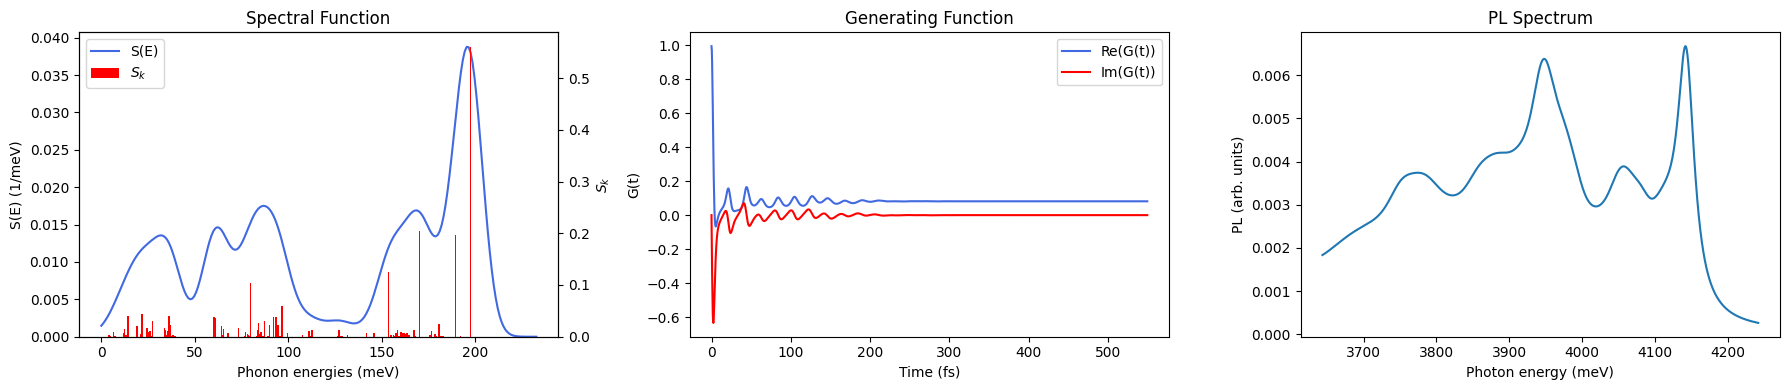

In [2]:
(R_gs, R_es, qk, modes, masses, (Ek, Sk), (E_meV_positive, S_E), (t_meV, t_fs, S_t, S_t_exact), (G_t), (E_meV, A_E), (L_E), IPR) = calculate_spectrum_analytical(
  path_structure_gs = os.path.expanduser("./contcar_gs_scratch_hse"),  # Path to ground state structure
  path_structure_es = os.path.expanduser("./contcar_esmc_scratch_hse"),  # Path to excited state structure
  phonons_source = "Phonopy",  # Options: "VASP" or "Phonopy"
  path_phonon_band = os.path.expanduser("./band_gs_scratch_hse.yaml"),  # Path to phonon band data
  zpl = 4143,  # Zero Phonon Line (meV)           3405, algo-3395
  gamma = 14,  # Gamma value (meV) - ZPL broadening
  sigma = 7, # Sigma value (meV) - Phonon sideband broadening
  temperature = 0, # Temperature
  tmax = 2000,  # Upper time limit (fs)
  forces = None #(os.path.expanduser("./OUTCAR_T"), os.path.expanduser("./OUTCAR_GS")),  # Options: None or tuple (ES file path, GS file path)
  
)

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# =========================
# 1) Spectral Function
# =========================
ax1 = axes[0]

l1, = ax1.plot(E_meV_positive, S_E, color="royalblue", label="S(E)")
ax1.set_xlabel("Phonon energies (meV)")
ax1.set_ylabel("S(E) (1/meV)")
ax1.set_ylim(0.0)

ax2 = ax1.twinx()
l2 = ax2.bar(Ek, Sk, color="red", label="$S_k$")
ax2.set_ylabel("$S_k$")
ax2.set_ylim(0.0)

ax1.set_title("Spectral Function")

ax1.legend(
    handles=[l1, l2],
    labels=["S(E)", "$S_k$"],
)

# =========================
# 2) Generating Function
# =========================
axes[1].plot(t_fs, np.real(G_t), label="Re(G(t))", color="royalblue")
axes[1].plot(t_fs, np.imag(G_t), label="Im(G(t))", color="red")
axes[1].set_xlabel("Time (fs)")
axes[1].set_ylabel("G(t)")
axes[1].legend()
axes[1].set_title("Generating Function")

# =========================
# 3) PL Spectrum
# =========================
axes[2].plot(E_meV, np.real(L_E))
axes[2].set_xlabel("Photon energy (meV)")
axes[2].set_ylabel("PL (arb. units)")
axes[2].set_title("PL Spectrum")

plt.tight_layout()
plt.show()

### Photoluminescence - Harmonic (numerical - generating function)

In [3]:
num_results = calculate_spectrum_numerical(num_states_max = 20, 
                                           Ek = Ek, 
                                           qk = qk, 
                                           anharmonic_coeffs_mode_gs = np.zeros((len(Ek),)), 
                                           anharmonic_coeffs_mode_es = np.zeros((len(Ek),)), 
                                           t_meV = t_meV, 
                                           zpl = 4143, 
                                           gamma = 8, 
                                           sigma = 0.25,
                                           generating_function_simulation=True, 
                                           monte_carlo_simulation=False,
                                           
                                           )

F = num_results["franck_condon_factors"]
delta_E = num_results["energy_phonon_mode"]
poisson_factors = num_results["poisson_factors_harmonic"]
t_fs, G_t_generating_function, E_meV_generating_function, L_generating_function = num_results["generating_function"]


Sum of absolute difference between harmonic-poissonian-factors and franck-condon-factor = 2.3188283023053015e-14.


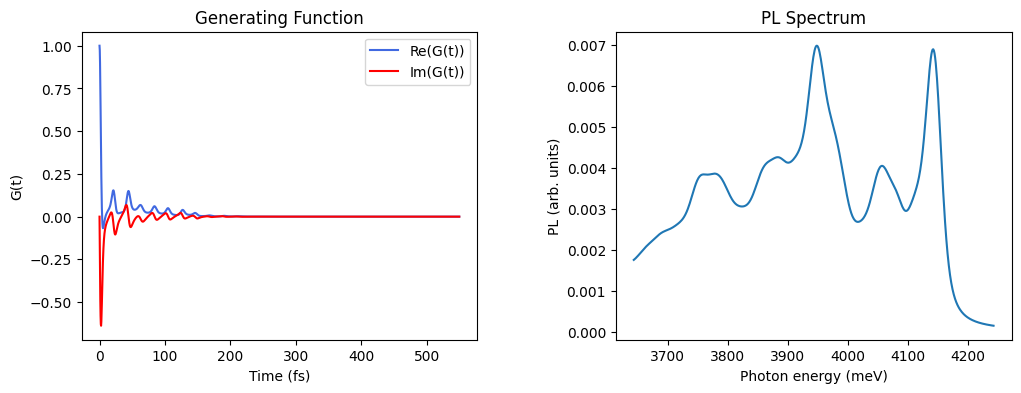

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# =========================
# 1) Generating function G(t)
# =========================
axes[0].plot(
    t_fs,
    np.real(G_t_generating_function),
    label="Re(G(t))",
    color="royalblue",
)
axes[0].plot(
    t_fs,
    np.imag(G_t_generating_function),
    label="Im(G(t))",
    color="red",
)
axes[0].set_xlabel("Time (fs)")
axes[0].set_ylabel("G(t)")
axes[0].legend()
axes[0].set_title("Generating Function")

# =========================
# 2) PL spectrum
# =========================
axes[1].plot(E_meV_generating_function, np.real(L_generating_function))
axes[1].set_xlabel("Photon energy (meV)")
axes[1].set_ylabel("PL (arb. units)")
axes[1].set_title("PL Spectrum")

plt.subplots_adjust(wspace=0.35)
# plt.tight_layout()
plt.show()


### Photoluminescence - Harmonic (numerical - Monte Carlo)

In [5]:
num_results = calculate_spectrum_numerical(num_states_max = 20, 
                                           Ek = Ek, 
                                           qk = qk, 
                                           anharmonic_coeffs_mode_gs = np.zeros((len(Ek),)), 
                                           anharmonic_coeffs_mode_es = np.zeros((len(Ek),)), 
                                           t_meV = t_meV, 
                                           zpl = 4143, 
                                           gamma = 12, 
                                           sigma = 7,
                                           generating_function_simulation=False, 
                                           monte_carlo_simulation=True,
                                           num_samples = 100000,
                                           )

F = num_results["franck_condon_factors"]
delta_E = num_results["energy_phonon_mode"]
poisson_factors = num_results["poisson_factors_harmonic"]
E_photon_monte_carlo, L_monte_carlo, E_phonons_monte_carlo, S_monte_carlo = num_results["monte_carlo"]

Sum of absolute difference between harmonic-poissonian-factors and franck-condon-factor = 2.3188283023053015e-14.


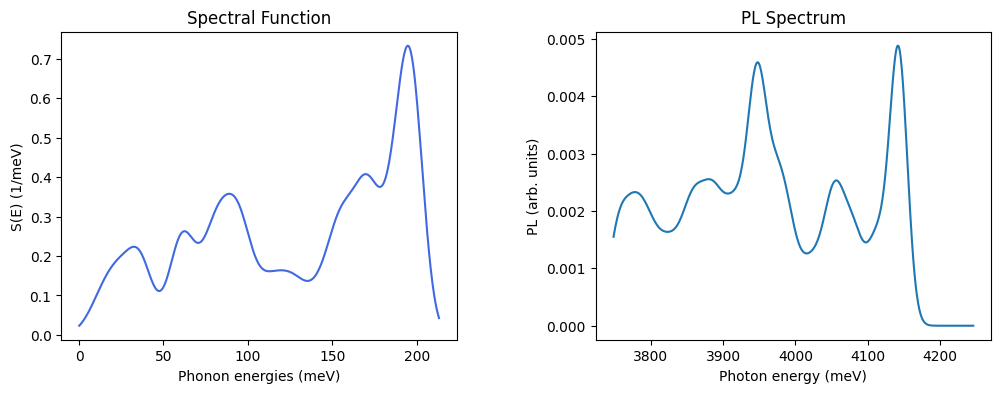

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# =========================
# 1) Spectral Function S(E)
# =========================
axes[0].plot(
    E_phonons_monte_carlo,
    S_monte_carlo,
    color="royalblue",
)
axes[0].set_xlabel("Phonon energies (meV)")
axes[0].set_ylabel("S(E) (1/meV)")
axes[0].set_title("Spectral Function")

# =========================
# 2) PL spectrum
# =========================
axes[1].plot(E_photon_monte_carlo, L_monte_carlo)
axes[1].set_xlabel("Photon energy (meV)")
axes[1].set_ylabel("PL (arb. units)")
axes[1].set_title("PL Spectrum")

plt.subplots_adjust(wspace=0.35)
# plt.tight_layout()
plt.show()

### Comparision between different methods for Harmonic Potential

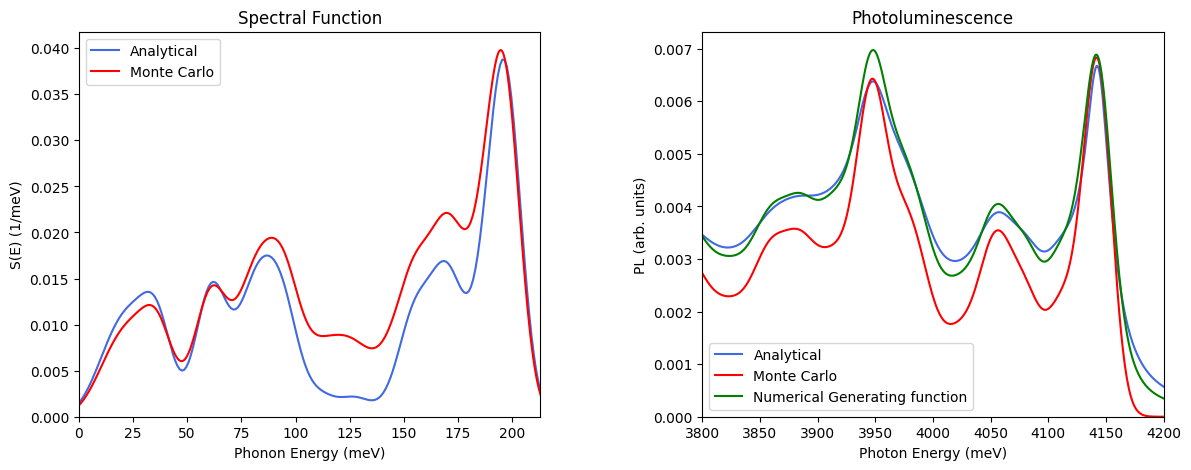

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# =========================
# 1) Spectral Function
# =========================
axes[0].plot(
    E_meV_positive, S_E,
    label="Analytical",
    color="royalblue"
)
axes[0].plot(
    E_phonons_monte_carlo,
    (0.038 / 0.7) * S_monte_carlo,
    label="Monte Carlo",
    color="red"
)
axes[0].set_xlabel("Phonon Energy (meV)")
axes[0].set_ylabel("S(E) (1/meV)")
axes[0].set_title("Spectral Function")
axes[0].set_xlim(0, 213)
axes[0].set_ylim(0)
axes[0].legend()

# =========================
# 2) Photoluminescence
# =========================
axes[1].plot(
    E_meV,
    np.real(L_E),
    label="Analytical",
    color="royalblue"
)
axes[1].plot(
    E_photon_monte_carlo,
    (0.007 / 0.005) * L_monte_carlo,
    label="Monte Carlo",
    color="red"
)
axes[1].plot(
    E_meV_generating_function,
    np.real(L_generating_function),
    label="Numerical Generating function",
    color="green"
)
axes[1].set_xlabel("Photon Energy (meV)")
axes[1].set_ylabel("PL (arb. units)")
axes[1].set_title("Photoluminescence")
axes[1].set_xlim(3800, 4200)
axes[1].set_ylim(0)
axes[1].legend()

plt.subplots_adjust(wspace=0.35)
plt.show()


### Select modes for anharmonicity

In [8]:
selected_indices = np.where((Sk > 0) & (Ek < 25))[0]
selected_indices

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

### Generate displaced POSCARs for VASP calculation

In [9]:
GenerateDisplacements(
    gs_poscar_path = os.path.expanduser("./contcar_gs_scratch_pbe"),  # Path to ground state POSCAR/CONTCAR
    normal_modes = modes,  # Normal mode eigenvector (numpy array of shape (number of atoms, 3))
    atomic_masses = masses,  # Atomic masses (1D numpy array)
    selected_indices = selected_indices, # Indices of selected modes to generate POSCARs
    disp_list=[-1.2, -0.8, -0.4, 0.4, 0.8, 1.2]  # List of displacement magnitudes
)

0.021971488556623054
0.014647659037748704
0.007323829518874352
-0.007323829518874352
-0.014647659037748704
-0.021971488556623054
0.023919983039525014
0.015946655359683343
0.007973327679841671
-0.007973327679841671
-0.015946655359683343
-0.023919983039525014
0.028104238297612372
0.018736158865074914
0.009368079432537457
-0.009368079432537457
-0.018736158865074914
-0.028104238297612372
0.012828322035090987
0.008552214690060659
0.004276107345030329
-0.004276107345030329
-0.008552214690060659
-0.012828322035090987
0.04924821943569625
0.03283214629046417
0.016416073145232087
-0.016416073145232087
-0.03283214629046417
-0.04924821943569625
0.03198368251002276
0.02132245500668184
0.01066122750334092
-0.01066122750334092
-0.02132245500668184
-0.03198368251002276
0.047295006184261114
0.031530004122840745
0.015765002061420372
-0.015765002061420372
-0.031530004122840745
-0.047295006184261114
0.04213793662357888
0.028091957749052588
0.014045978874526294
-0.014045978874526294
-0.028091957749052588
-

<br>
<br>

### Transfer the "disp" folder to HPC for calculations and extract energies for all displacements.
##### Make a numpy array "disp_energies" with shape = (len(selected_indices), len(disp_list)).

<br>
<br>

### Fit the parameters to obtain anharmonic potential energy surface

#### wk = 2*np.pi*(Ek/4.13566)/np.sqrt(9.646) [sqrt(meV/AMU)/Angstrom]

In [10]:
disp_list=np.array([-1.2, -0.8, -0.4, 0.4, 0.8, 1.2, 0.0])
disp_energies = np.zeros((len(selected_indices), len(disp_list)))
disp_energies[:, :len(disp_list) - 1] = np.load("disp_energies.npy")
gs_energy = -.19175110E+04
disp_energies = (disp_energies - gs_energy)*1e3

print(disp_energies.shape)

def potential_curve(Q, wk, lam):
        return 0.5 * (wk**2) * (Q**2) + lam * (Q**3)
wk_init = (2*np.pi*(Ek/4.13566)/np.sqrt(9.646))[selected_indices]

anharmonic_coeffs_mode = np.zeros((len(selected_indices),))
wk_final = np.zeros((len(selected_indices),))
for i in range(len(selected_indices)):
        params, pcov = curve_fit(potential_curve, disp_list, disp_energies[i], p0=[wk_init[i], 0])
        anharmonic_coeffs_mode[i] = params[1]
        wk_final[i] = params[0]
wk_error = np.abs(wk_final - wk_init).sum()
print(f"total change in frequencies: {wk_error} meV")
Ek[selected_indices] = np.sqrt(9.646)*(wk_final*4.13566)/(2*np.pi)

(45, 7)
total change in frequencies: 9.423290073711613 meV


In [15]:
anharmonic_coeffs_mode

array([-7.18277714e-01,  1.19074706e-17, -2.46969461e-01,  2.65664360e-02,
        1.92852647e-01, -6.39562348e-01, -5.09280643e-18,  4.21127193e-01,
       -2.65664352e-02,  3.93576816e-01,  4.03416276e-02, -1.03904287e+00,
        5.97252861e-01, -2.19419090e-01, -7.87153669e-03,  5.00826534e-01,
        7.87153469e-03,  1.48181661e+00, -6.91711204e-01,  2.75503760e-02,
       -3.94560734e-01,  7.08438214e-02,  8.39302501e-01,  1.86752186e+00,
        6.43498048e-01, -2.23775909e-16, -1.66286194e-01, -1.76192399e-16,
       -1.92852628e-01,  9.83942029e-04, -8.99323223e-01,  3.54219218e-02,
       -1.48083308e+00,  2.65664391e-02,  7.87154022e-03,  9.32777259e-01,
        9.05226758e-02, -9.19002055e-01,  2.75503816e-02,  3.44379793e-02,
        5.27393057e-01,  3.54219218e-02,  1.32832205e-01, -9.83942527e-04,
       -9.36713030e-01])

### Anharmonic Numerical Spectra

In [17]:
anharmonic_coeffs_mode_gs = np.zeros((len(Ek),))
anharmonic_coeffs_mode_gs[selected_indices] = anharmonic_coeffs_mode
num_results = calculate_spectrum_numerical(num_states_max = 20, 
                                           Ek = Ek, 
                                           qk = qk, 
                                           anharmonic_coeffs_mode_gs = anharmonic_coeffs_mode_gs, 
                                           anharmonic_coeffs_mode_es = np.zeros((len(Ek),)), 
                                           t_meV = t_meV, 
                                           zpl = 4143, 
                                           gamma = 8, 
                                           sigma = 0.25,
                                           generating_function_simulation=True, 
                                           monte_carlo_simulation=False,
                                           )

F_anharmonic = num_results["franck_condon_factors"]
delta_E_anharmonic = num_results["energy_phonon_mode"]
poisson_factors = num_results["poisson_factors_harmonic"]
t_fs, G_t_generating_function_anharmonic, E_meV_generating_function_anharmonic, L_generating_function_anharmonic = num_results["generating_function"]

num_results = calculate_spectrum_numerical(num_states_max = 20, 
                                           Ek = Ek, 
                                           qk = qk, 
                                           anharmonic_coeffs_mode_gs = anharmonic_coeffs_mode_gs, 
                                           anharmonic_coeffs_mode_es = np.zeros((len(Ek),)), 
                                           t_meV = t_meV, 
                                           zpl = 4143, 
                                           gamma = 12, 
                                           sigma = 7,
                                           generating_function_simulation=False, 
                                           monte_carlo_simulation=True,
                                           num_samples = 100000,
                                           )

F_anharmonic = num_results["franck_condon_factors"]
delta_E_anharmonic = num_results["energy_phonon_mode"]
poisson_factors = num_results["poisson_factors_harmonic"]
E_photon_monte_carlo_anharmonic, L_monte_carlo_anharmonic, E_phonons_monte_carlo_anharmonic, S_monte_carlo_anharmonic = num_results["monte_carlo"]

Sum of absolute difference between harmonic-poissonian-factors and franck-condon-factor = 2.0755892846164743.
Sum of absolute difference between harmonic-poissonian-factors and franck-condon-factor = 2.0755892846164743.


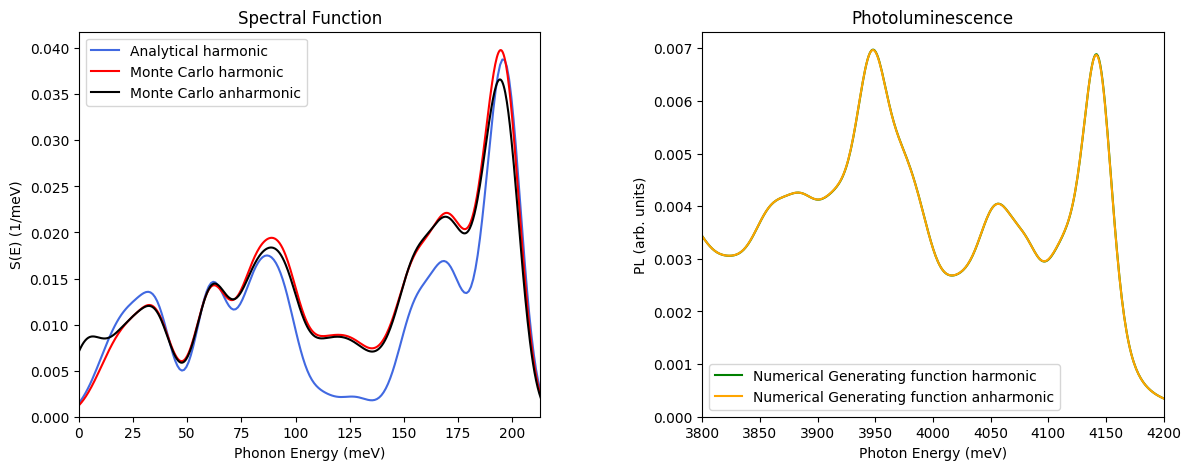

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# =========================
# 1) Spectral Function
# =========================
axes[0].plot(
    E_meV_positive, S_E,
    label="Analytical harmonic",
    color="royalblue"
)
axes[0].plot(
    E_phonons_monte_carlo,
    (0.038 / 0.7) * S_monte_carlo,
    label="Monte Carlo harmonic",
    color="red"
)
axes[0].plot(
    E_phonons_monte_carlo_anharmonic,
    (0.038 / 0.7) * S_monte_carlo_anharmonic,
    label="Monte Carlo anharmonic",
    color="black"
)
axes[0].set_xlabel("Phonon Energy (meV)")
axes[0].set_ylabel("S(E) (1/meV)")
axes[0].set_title("Spectral Function")
axes[0].set_xlim(0, 213)
axes[0].set_ylim(0)
axes[0].legend()

# =========================
# 2) Photoluminescence
# =========================
# axes[1].plot(
#     E_meV,
#     np.real(L_E),
#     label="Analytical harmonic",
#     color="royalblue"
# )
# axes[1].plot(
#     E_photon_monte_carlo,
#     (0.007 / 0.005) * L_monte_carlo,
#     label="Monte Carlo harmonic",
#     color="red"
# )
axes[1].plot(
    E_meV_generating_function,
    np.real(L_generating_function),
    label="Numerical Generating function harmonic",
    color="green"
)
# axes[1].plot(
#     E_photon_monte_carlo_anharmonic,
#     (0.007 / 0.005) * L_monte_carlo_anharmonic,
#     label="Monte Carlo anharmonic",
#     color="black"
# )
axes[1].plot(
    E_meV_generating_function_anharmonic,
    np.real(L_generating_function_anharmonic),
    label="Numerical Generating function anharmonic",
    color="orange"
)
axes[1].set_xlabel("Photon Energy (meV)")
axes[1].set_ylabel("PL (arb. units)")
axes[1].set_title("Photoluminescence")
axes[1].set_xlim(3800, 4200)
axes[1].set_ylim(0)
axes[1].legend()

plt.subplots_adjust(wspace=0.35)
plt.show()


### ZPL weight (Debye Waller Factor)

In [18]:
print(f"ZPL weight for harmonic spectra = {np.prod(F[:,0])}")
print(f"ZPL weight for anharmonic spectra = {np.prod(F_anharmonic[:,0])}")

ZPL weight for harmonic spectra = 0.08135457616481054
ZPL weight for anharmonic spectra = 1.120960322788108e-12
